## Importy i tunel

In [1]:
from pyhive import hive
import pandas as pd

conn_gold = hive.Connection(
    host="127.0.0.1",
    port=10000,
    username="vagrant",
    database="gold"
)

query_gold = """
SELECT
    station_id,
    station_name,
    area_id,
    lat,
    lon,
    events_ts,
    dt,
    hour,
    bikes_available,
    slots_available,
    occupancy_ratio,
    temperature_avg,
    wind_speed_avg,
    precipitation_sum,
    trips_count,
    avg_delay_minutes,
    canceled_trips_count,
    gold_ingestion_ts
FROM gold.bike_weather_bvg_features
"""

df = pd.read_sql(query_gold, conn_gold)

conn_silver = hive.Connection(
    host="127.0.0.1",
    port=10000,
    username="vagrant",
    database="silver"
)

query_silver_nb = """
SELECT
    station_id,
    station_name,
    area_id,
    lat,
    lon,
    events_ts,
    dt,
    hour,
    bikes_available,
    slots_available,
    is_reserved,
    is_disabled
FROM silver.nextbike_states
"""

df2 = pd.read_sql(query_silver_nb, conn_silver)

df["dt"] = pd.to_datetime(df["dt"], errors="coerce")
df2["dt"] = pd.to_datetime(df2["dt"], errors="coerce")
df["hour"] = df["hour"].astype(int)
df2["hour"] = df2["hour"].astype(int)
df["day_of_week"] = df["dt"].dt.dayofweek
df["hour_of_day"] = df["hour"]


C:\Users\Laptop\AppData\Local\Temp\ipykernel_60844\3823709550.py:34: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_gold, conn_gold)
C:\Users\Laptop\AppData\Local\Temp\ipykernel_60844\3823709550.py:60: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql(query_silver_nb, conn_silver)


## Statystytki opisowe

In [2]:
display(df.head())
display(df2.head())

display(df.info())
display(df2.info())

display(df.describe())
display(df2.describe())

null_report = (df.isnull().sum() / len(df)) * 100
print(null_report.sort_values(ascending=False))

print(df.shape)
print(df["dt"].value_counts())
print(df["hour"].value_counts())
print(df[["temperature_avg", "trips_count"]].isna().mean())


,station_id,station_name,area_id,lat,lon,events_ts,dt,hour,bikes_available,slots_available,occupancy_ratio,temperature_avg,wind_speed_avg,precipitation_sum,trips_count,avg_delay_minutes,canceled_trips_count,gold_ingestion_ts,day_of_week,hour_of_day
0,101639465,Ackerstraße (Park),362,52.530639,13.396750,2026-01-20 01:59:44.708,2026-01-20,1,1,3,0.25,-1.39,3.60,0.0,4957,-0.156748,0,2026-01-20 11:47:31.962,1,1
1,10321394,Torgauer Straße/Cherusker Straße,362,52.480154,13.358919,2026-01-20 02:59:45.501,2026-01-20,2,1,3,0.25,-1.38,3.60,0.0,47,-1.361702,0,2026-01-20 11:47:31.962,1,2
2,10321394,Torgauer Straße/Cherusker Straße,362,52.480154,13.358919,2026-01-20 03:59:46.586,2026-01-20,3,1,3,0.25,-2.24,3.09,0.0,21,0.000000,0,2026-01-20 11:47:31.962,1,3
3,10321452,Winterfeldtstraße/Frobenstraße,362,52.496352,13.358946,2026-01-20 02:59:45.501,2026-01-20,2,1,3,0.25,-1.38,3.60,0.0,47,-1.361702,0,2026-01-20 11:47:31.962,1,2
4,10321452,Winterfeldtstraße/Frobenstraße,362,52.496352,13.358946,2026-01-20 04:59:30.721,2026-01-20,4,1,3,0.25,-2.51,2.68,0.0,31,0.000000,0,2026-01-20 11:47:31.962,1,4


,station_id,station_name,area_id,lat,lon,events_ts,dt,hour,bikes_available,slots_available,is_reserved,is_disabled
0,10321452,Winterfeldtstraße/Frobenstraße,362,52.496352,13.358946,2026-01-20 03:54:45.948,2026-01-20,3,1,3,0,0
1,10321496,Kulturforum,362,52.508206,13.367100,2026-01-20 03:54:45.948,2026-01-20,3,6,0,0,0
2,10438240,Jelbi S Treptower Park/Martin-Hoffmann-Straße ...,362,52.494300,13.460490,2026-01-20 03:54:45.948,2026-01-20,3,0,7,0,0
3,10438266,Brachvogelstraße/Johanniterstraße,362,52.496493,13.398814,2026-01-20 03:54:45.948,2026-01-20,3,3,1,0,0
4,10456956,U Tierpark (Mobilitätsstation),362,52.496680,13.523770,2026-01-20 03:54:45.948,2026-01-20,3,0,4,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22840 entries, 0 to 22839
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   station_id            22840 non-null  object        
 1   station_name          22840 non-null  object        
 2   area_id               22840 non-null  object        
 3   lat                   22840 non-null  float64       
 4   lon                   22840 non-null  float64       
 5   events_ts             22840 non-null  datetime64[ns]
 6   dt                    22840 non-null  datetime64[ns]
 7   hour                  22840 non-null  int64         
 8   bikes_available       22840 non-null  int64         
 9   slots_available       22840 non-null  int64         
 10  occupancy_ratio       22829 non-null  float64       
 11  temperature_avg       22840 non-null  float64       
 12  wind_speed_avg        22840 non-null  float64       
 13  precipitation_su

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255385 entries, 0 to 255384
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   station_id       255385 non-null  object        
 1   station_name     255385 non-null  object        
 2   area_id          255385 non-null  object        
 3   lat              255385 non-null  float64       
 4   lon              255385 non-null  float64       
 5   events_ts        255385 non-null  datetime64[ns]
 6   dt               255385 non-null  datetime64[ns]
 7   hour             255385 non-null  int64         
 8   bikes_available  255385 non-null  int64         
 9   slots_available  255385 non-null  int64         
 10  is_reserved      255385 non-null  int64         
 11  is_disabled      255385 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(5), object(3)
memory usage: 23.4+ MB


None

,lat,lon,events_ts,dt,hour,bikes_available,slots_available,occupancy_ratio,temperature_avg,wind_speed_avg,precipitation_sum,trips_count,avg_delay_minutes,canceled_trips_count,gold_ingestion_ts,day_of_week,hour_of_day
count,22840.000000,22840.000000,22840,22840,22840.000000,22840.000000,22840.000000,22829.000000,22840.000000,22840.000000,22840.0,22840.000000,22840.000000,22840.0,22840,22840.0,22840.000000
mean,52.500201,13.410888,2026-01-20 06:57:23.075205376,2026-01-20 00:00:00,6.000613,0.965718,3.957443,0.182971,-1.903550,3.612875,0.0,528.751226,-0.138017,0.0,2026-01-20 11:47:31.961999872,1.0,6.000613
min,52.408540,13.153335,2026-01-20 01:59:44.708000,2026-01-20 00:00:00,1.000000,0.000000,0.000000,0.000000,-2.900000,2.680000,0.0,21.000000,-1.361702,0.0,2026-01-20 11:47:31.962000,1.0,1.000000
25%,52.473102,13.348589,2026-01-20 03:59:46.585999872,2026-01-20 00:00:00,3.000000,0.000000,3.000000,0.000000,-2.530000,3.090000,0.0,47.000000,0.000000,0.0,2026-01-20 11:47:31.961999872,1.0,3.000000
50%,52.501495,13.407470,2026-01-20 06:59:33.312000,2026-01-20 00:00:00,6.000000,0.000000,4.000000,0.000000,-2.240000,3.580000,0.0,60.000000,0.000000,0.0,2026-01-20 11:47:31.961999872,1.0,6.000000
75%,52.523405,13.468187,2026-01-20 09:59:34.846000128,2026-01-20 00:00:00,9.000000,1.000000,4.000000,0.250000,-1.380000,4.120000,0.0,102.000000,0.000000,0.0,2026-01-20 11:47:31.961999872,1.0,9.000000
max,52.595837,13.721039,2026-01-20 11:34:36.713000,2026-01-20 00:00:00,11.000000,19.000000,20.000000,1.000000,0.630000,5.660000,0.0,4957.000000,0.000000,0.0,2026-01-20 11:47:31.962000,1.0,11.000000
std,0.035250,0.085302,NaN,NaN,3.162444,1.702464,2.123230,0.263608,0.970382,0.834795,0.0,1401.836940,0.389523,0.0,NaN,0.0,3.162444


,lat,lon,events_ts,dt,hour,bikes_available,slots_available,is_reserved,is_disabled
count,255385.000000,255385.000000,255385,255385,255385.000000,255385.000000,255385.000000,255385.0,255385.0
mean,52.500203,13.410888,2026-01-20 06:43:21.652090880,2026-01-20 00:00:00,6.179384,0.965938,3.954210,0.0,0.0
min,52.408540,13.153335,2026-01-20 01:34:48.136000,2026-01-20 00:00:00,1.000000,0.000000,0.000000,0.0,0.0
25%,52.473102,13.348589,2026-01-20 04:01:45.855000064,2026-01-20 00:00:00,4.000000,0.000000,3.000000,0.0,0.0
50%,52.501495,13.407470,2026-01-20 06:44:34.315000064,2026-01-20 00:00:00,6.000000,0.000000,4.000000,0.0,0.0
75%,52.523405,13.468187,2026-01-20 09:19:35.153999872,2026-01-20 00:00:00,9.000000,1.000000,4.000000,0.0,0.0
max,52.595837,13.721039,2026-01-20 11:49:39.028000,2026-01-20 00:00:00,11.000000,19.000000,20.000000,0.0,0.0
std,0.035248,0.085301,NaN,NaN,3.006977,1.696270,2.121764,0.0,0.0


occupancy_ratio         0.048161
station_id              0.000000
area_id                 0.000000
station_name            0.000000
lat                     0.000000
lon                     0.000000
dt                      0.000000
events_ts               0.000000
hour                    0.000000
bikes_available         0.000000
slots_available         0.000000
temperature_avg         0.000000
wind_speed_avg          0.000000
precipitation_sum       0.000000
trips_count             0.000000
avg_delay_minutes       0.000000
canceled_trips_count    0.000000
gold_ingestion_ts       0.000000
day_of_week             0.000000
hour_of_day             0.000000
dtype: float64
(22840, 20)
dt
2026-01-20    22840
Name: count, dtype: int64
hour
11    2077
8     2077
10    2077
9     2077
3     2076
1     2076
2     2076
4     2076
6     2076
5     2076
7     2076
Name: count, dtype: int64
temperature_avg    0.0
trips_count        0.0
dtype: float64


## Ranking stacji według zajętości

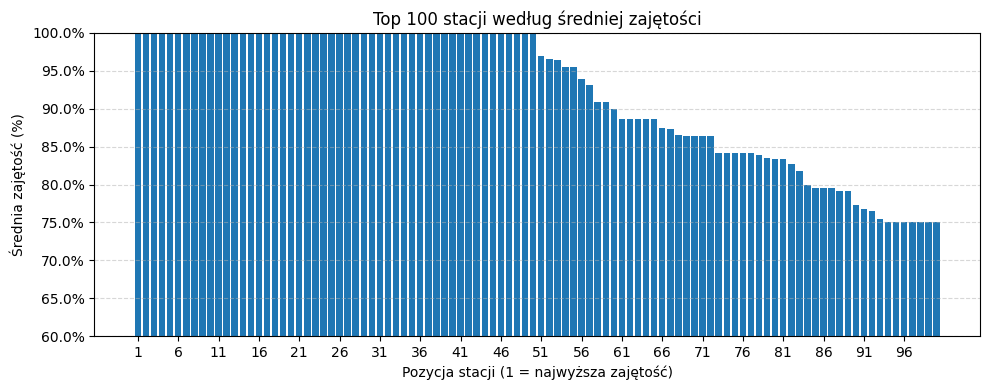

,station_id,station_name,avg_occupancy_ratio,avg_bikes,avg_slots
0,6021742,Jelbi Große Hamburger Straße/Auguststraße (MIT...,1.0,8.272727,0.0
1,595035761,Jelbi Marlene-Dietrich-Platz (MIT/MD),1.0,5.000000,0.0
2,44941685,EDEKA Wittenbergplatz,1.0,5.090909,0.0
3,58223390,Jelbi Charitéplatz (MIT/CP),1.0,9.909091,0.0
4,584093059,Jelbi HTW Campus Wilhelminenhof (OBE/CW),1.0,5.272727,0.0
5,136259837,Koenigsallee/Oberhaardter Weg,1.0,6.000000,0.0
6,136257359,U Rüdesheimer Platz (Nord),1.0,5.000000,0.0
7,136234182,S Savignyplatz (Else-Ury-Bogen),1.0,8.545455,0.0
8,521314497,Uber Platz (Nord-Ost),1.0,4.000000,0.0
9,386219142,Jelbi Niederkirchnerstraße (MIT/NI),1.0,9.272727,0.0


In [29]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

station_rank = (
    df.groupby(["station_id", "station_name"], as_index=False)
      .agg(
          avg_occupancy=("occupancy_ratio", "mean"),
          avg_bikes=("bikes_available", "mean"),
          avg_slots=("slots_available", "mean")
      )
)

station_rank = station_rank.sort_values("avg_occupancy", ascending=False).reset_index(drop=True)

top_n = 100
top = station_rank.head(top_n).copy()
top["pozycja"] = top.index + 1

fig, ax = plt.subplots(figsize=(10, 4))
ax.bar(top["pozycja"], top["avg_occupancy"])

ax.set_xlabel("Pozycja stacji (1 = najwyższa zajętość)")
ax.set_ylabel("Średnia zajętość (%)")
ax.set_title(f"Top {top_n} stacji według średniej zajętości")

ax.set_xticks(range(1, top_n + 1, 5))
ax.set_xticklabels(range(1, top_n + 1, 5))
ax.set_ylim(0.6, 1.0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

ax.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

station_rank = station_rank.rename(columns={"avg_occupancy": "avg_occupancy_ratio"})
display(station_rank.head(10))


## Temperatura vs. zajętość

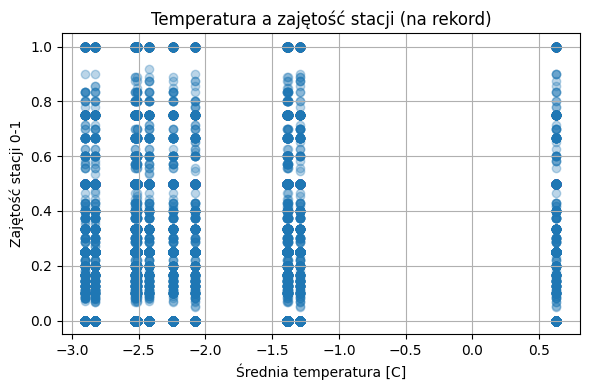

In [8]:
temp_occ = df.dropna(subset=["occupancy_ratio", "temperature_avg"])

plt.figure(figsize=(6, 4))
plt.scatter(temp_occ["temperature_avg"], temp_occ["occupancy_ratio"], alpha=0.3)
plt.xlabel("Średnia temperatura [C]")
plt.ylabel("Zajętość stacji 0-1")
plt.title("Temperatura a zajętość stacji (na rekord)")
plt.grid(True)
plt.tight_layout()
plt.show()


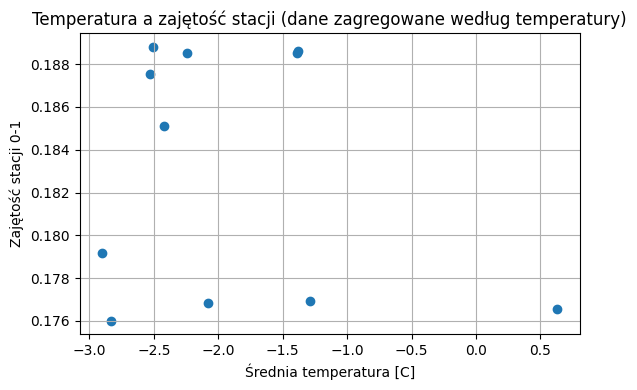

In [9]:
temp_agg = (
    temp_occ.groupby("temperature_avg", as_index=False)
            .agg(avg_occupancy=("occupancy_ratio", "mean"))
)

plt.figure(figsize=(6, 4))
plt.scatter(temp_agg["temperature_avg"], temp_agg["avg_occupancy"])
plt.xlabel("Średnia temperatura [C]")
plt.ylabel("Zajętość stacji 0-1")
plt.title("Temperatura a zajętość stacji (dane zagregowane według temperatury)")
plt.grid(True)
plt.tight_layout()
plt.show()

## Zajętość stacji i podróż transportem publicznym według godziny

    hour  avg_occupancy  avg_trips
0      1       0.188532     4957.0
1      2       0.188600       47.0
2      3       0.188524       21.0
3      4       0.188819       31.0
4      5       0.187541       55.0
5      6       0.185103       60.0
6      7       0.176020       60.0
7      8       0.179178      280.0
8      9       0.176852      102.0
9     10       0.176942      102.0
10    11       0.176575      102.0


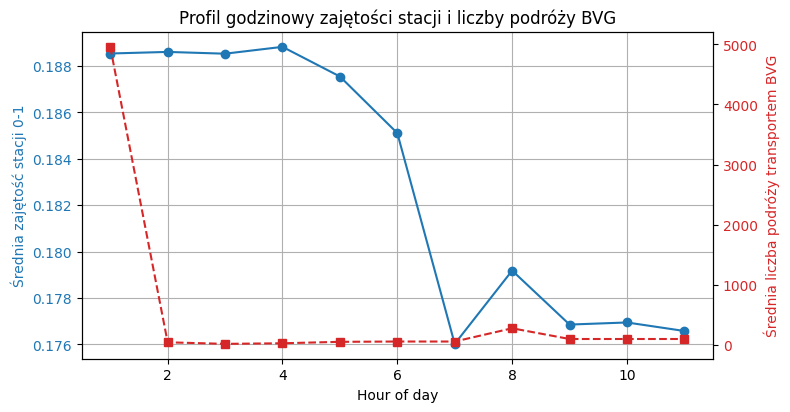

In [12]:
hourly_profile = (
    df.groupby("hour", as_index=False)
      .agg(
          avg_occupancy=("occupancy_ratio", "mean"),
          avg_trips=("trips_count", "mean")
      )
      .sort_values("hour")
)

print(hourly_profile)

fig, ax1 = plt.subplots(figsize=(8, 4))
ax1.plot(hourly_profile["hour"], hourly_profile["avg_occupancy"], marker="o", label="Avg occupancy")
ax1.set_xlabel("Hour of day")
ax1.set_ylabel("Średnia zajętość stacji 0-1", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(hourly_profile["hour"], hourly_profile["avg_trips"], marker="s", linestyle="--", label="Avg BVG trips", color="tab:red")
ax2.set_ylabel("Średnia liczba podróży transportem BVG", color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")

fig.tight_layout()
plt.title("Profil godzinowy zajętości stacji i liczby podróży BVG")
plt.show()


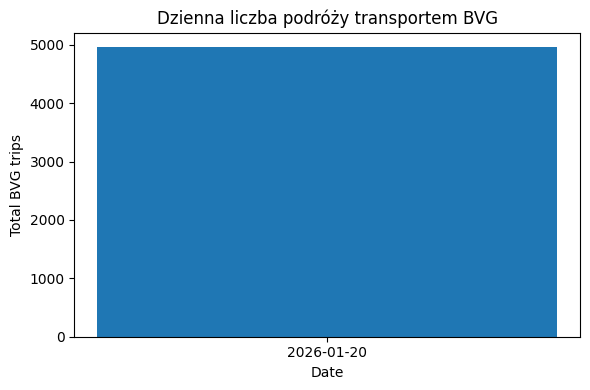

In [23]:
bvg_daily = (
    df[["dt", "trips_count"]]
      .dropna()
      .drop_duplicates()
      .sort_values("dt")
)

plt.figure(figsize=(6, 4))
plt.bar(bvg_daily["dt"].astype(str), bvg_daily["trips_count"])
plt.xlabel("Date")
plt.ylabel("Total BVG trips")
plt.title("Dzienna liczba podróży transportem BVG")
plt.tight_layout()
plt.show()


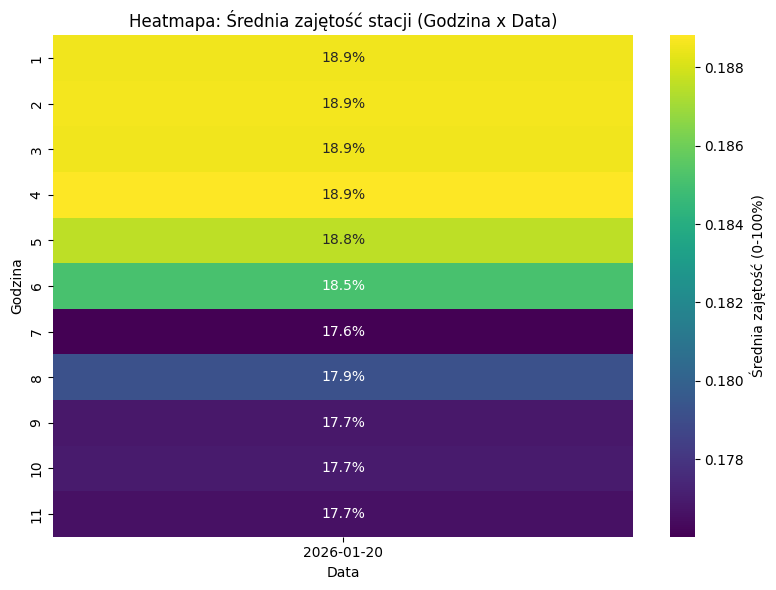

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df['data_str'] = df['dt'].dt.strftime('%Y-%m-%d')

heat = (
    df.groupby(["data_str", "hour"])["occupancy_ratio"]
    .mean()
    .reset_index()
    .pivot(index="hour", columns="data_str", values="occupancy_ratio")
    .sort_index()
)

plt.figure(figsize=(8, 6)) 

sns.heatmap(
    heat,
    annot=True,        
    fmt=".1%",          
    cmap="viridis",     
    cbar_kws={"label": "Średnia zajętość (0-100%)"} 
)

plt.xlabel("Data")
plt.ylabel("Godzina")
plt.title("Heatmapa: Średnia zajętość stacji (Godzina x Data)")

plt.tight_layout()
plt.show()

## Korelacje między zmiennymi (np. do predykcji zajętości stacji)

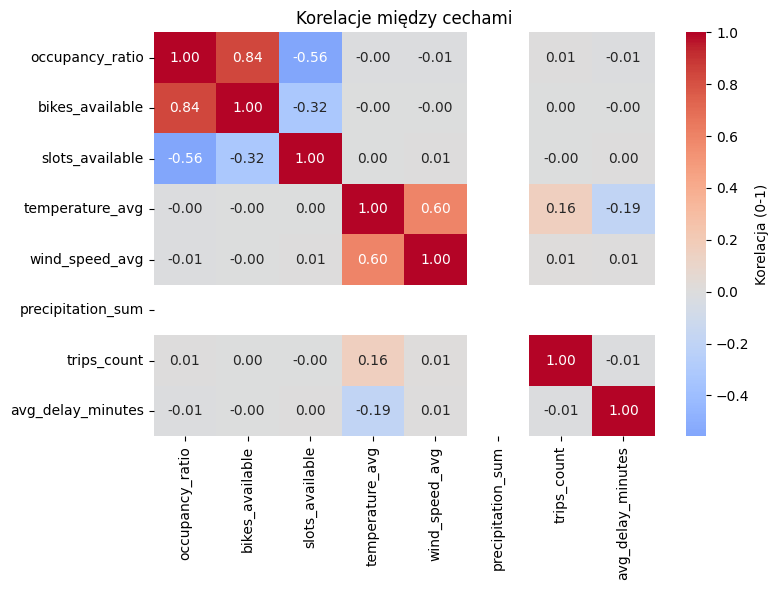

            feature_1        feature_2      corr  abs_corr
0     bikes_available  occupancy_ratio  0.839841  0.839841
9      wind_speed_avg  temperature_avg  0.598347  0.598347
1     slots_available  occupancy_ratio -0.557745  0.557745
2     slots_available  bikes_available -0.323612  0.323612
18  avg_delay_minutes  temperature_avg -0.190799  0.190799
13        trips_count  temperature_avg  0.163536  0.163536
6      wind_speed_avg  occupancy_ratio -0.012455  0.012455
14        trips_count   wind_speed_avg  0.009561  0.009561
15  avg_delay_minutes  occupancy_ratio -0.007558  0.007558
8      wind_speed_avg  slots_available  0.006468  0.006468


In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = [
    "occupancy_ratio",
    "bikes_available",
    "slots_available",
    "temperature_avg",
    "wind_speed_avg",
    "precipitation_sum",
    "trips_count",
    "avg_delay_minutes",
]

corr = df[num_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    cbar_kws={"label": "Korelacja (0-1)"}
)
plt.title("Korelacje między cechami")
plt.tight_layout()
plt.show()

mask = np.triu(np.ones_like(corr, dtype=bool), k=0)

corr_unstacked = (
    corr.mask(mask)
        .stack()
        .reset_index()
        .rename(columns={"level_0": "feature_1", "level_1": "feature_2", 0: "corr"})
)

corr_unstacked["abs_corr"] = corr_unstacked["corr"].abs()
print(corr_unstacked.sort_values("abs_corr", ascending=False).head(10))


In [30]:
import folium
from IPython.display import IFrame

stations_map = (
    df.dropna(subset=["lat", "lon"])
      .groupby(["station_id", "station_name", "lat", "lon"], as_index=False)
      .agg(avg_occupancy=("occupancy_ratio", "mean"))
)

center_lat = stations_map["lat"].mean()
center_lon = stations_map["lon"].mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

for _, row in stations_map.iterrows():
    popup_text = f"{row['station_id']} - occ={row['avg_occupancy']:.2f}"
    folium.CircleMarker(
        location=[row["lat"], row["lon"]],
        radius=5,
        color="#3388ff",
        fill=True,
        fill_color="#3388ff",
        fill_opacity=0.8,
        popup=popup_text,
    ).add_to(m)

IFrame(src='mapka.html', width=800, height=600)
